/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'cnn_with_pi_conv_output_9', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


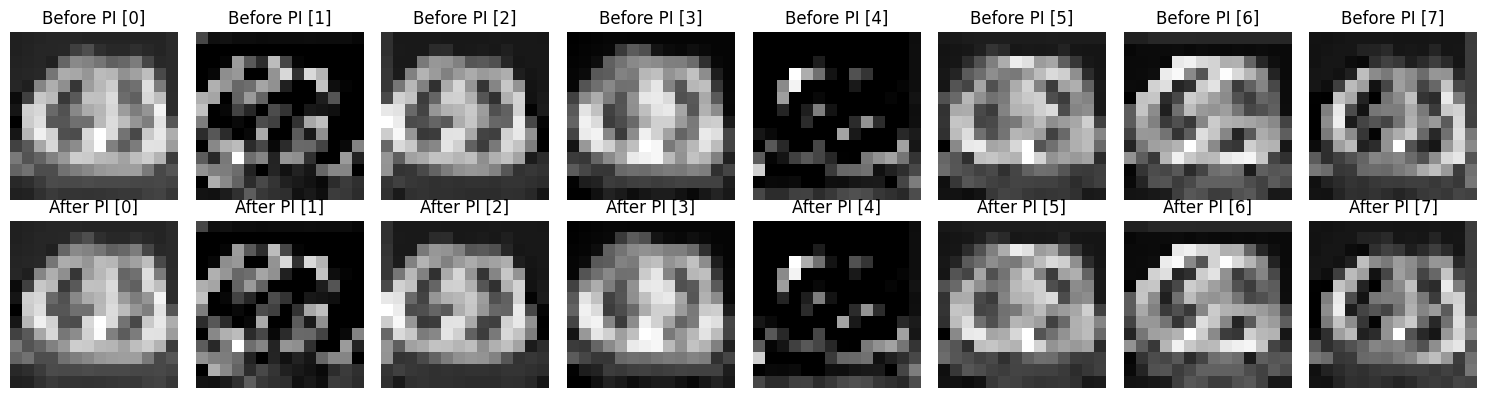

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- Custom PI Layer ---
class PILayer(tf.keras.layers.Layer):
    def __init__(self, target_intensity=0.5, Kp=0.6, Ki=0.05, max_iter=1, **kwargs):
        super(PILayer, self).__init__(**kwargs)
        self.target_intensity = target_intensity
        self.Kp = Kp
        self.Ki = Ki
        self.max_iter = max_iter

    def call(self, inputs):
        out = tf.identity(inputs)
        integral_error = 0.0
        for _ in range(self.max_iter):
            current_avg = tf.reduce_mean(out)
            error = self.target_intensity - current_avg
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            out = out + adjustment
            out = tf.clip_by_value(out, 0.0, 1.0)
        return out

# --- CNN Model with PI Layer ---
class CNNWithPIConvOutput(tf.keras.Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()

        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

          self.pi = PILayer()

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')
        self.global_avg_pool = layers.GlobalAveragePooling2D()

    def call(self, inputs, training=False, return_features=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        feat_before = x
        x = self.pi(x)
        feat_after = x

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        x = self.out_conv(x)
        x = self.global_avg_pool(x)

        if return_features:
            return x, feat_before, feat_after
        return x

# --- Image Preprocessing (for TensorFlow) ---
def load_image_tf(path):
    img = Image.open(path).convert("L")  # Grayscale
    img = img.resize((28, 28))
    img_array = np.array(img).astype(np.float32) / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=(0, -1))   # Shape: (1, 28, 28, 1)
    return img_array

# --- Plot Feature Maps ---
def plot_feature_maps(before, after, num_maps=8):
    before = before.numpy()
    after = after.numpy()
    fig, axes = plt.subplots(2, num_maps, figsize=(15, 4))
    for i in range(num_maps):
        axes[0, i].imshow(before[0, :, :, i], cmap='gray')
        axes[0, i].set_title(f'Before PIC [{i}]')
        axes[0, i].axis('off')
        axes[1, i].imshow(after[0, :, :, i], cmap='gray')
        axes[1, i].set_title(f'After PIC [{i}]')
        axes[1, i].axis('off')
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
image_path = '/content/Malignant case (2).jpg'  # Replace with your actual path
input_img = load_image_tf(image_path)

model = CNNWithPIConvOutput()
model.build(input_shape=(None, 28, 28, 1))  # Build the model

# Run a forward pass
output, feat_before, feat_after = model(input_img, return_features=True)

# Plot feature maps
plot_feature_maps(feat_before, feat_after, num_maps=min(8, feat_before.shape[-1]))

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential  # Assuming TensorFlow 2.0+
import keras
!pip install keras
from tensorflow.keras.callbacks import ModelCheckpoint
!pip install keras-preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2
import PIL.Image
from tensorflow.keras.preprocessing.image import load_img

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = '/content/42.zip'

# Specify the directory where you want to extract the files
extract_to_dir = '/content/29unzip'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# Print a message indicating the extraction directory
print(f"Files extracted to {extract_to_dir}")

Files extracted to /content/29unzip


In [ ]:
!pip install tensorflow keras numpy matplotlib

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
input_folder = '/content/29unzip/1111/Bengin cases'
output_folder = '/content/29unzip/1111/Bengin cases'
os.makedirs(output_folder, exist_ok=True)

target_total = 500
current_count = len(os.listdir(input_folder))
images_needed = target_total - current_count

image_files = os.listdir(input_folder)
generated = 0

while generated < images_needed:
    for img_file in image_files:
        img_path = os.path.join(input_folder, img_file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate one augmented image per iteration
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder,
                                  save_prefix='aug', save_format='jpeg'):
            generated += 1
            if generated >= images_needed:
                break
    if generated >= images_needed:
        break

print(f"Generated {generated} augmented images.")

Generated 499 augmented images.


In [ ]:
#count number of images and classes Benign=0 maligant=1
ROOT_DIR="/content/29unzip/1111"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
       number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
       number_of_images.items()

In [ ]:
number_of_images.items()

dict_items([('Bengin cases', 610), ('Malignant cases', 561)])

In [ ]:
import os
import shutil
import random
import math

ROOT_DIR = '/content/29unzip/1111'  # replace with your dataset root
random.seed(42)  # for reproducibility

# Count the number of images in each class
number_of_images = {}
for dir_name in os.listdir(ROOT_DIR):
    dir_path = os.path.join(ROOT_DIR, dir_name)
    if os.path.isdir(dir_path):
        number_of_images[dir_name] = len(os.listdir(dir_path))

# Create train, validation, and test folders if not exist
for split in ['train111x', 'validation111x', 'test111x']:
    if not os.path.exists(split):
        os.mkdir(split)
        for class_name in os.listdir(ROOT_DIR):
            class_path = os.path.join(ROOT_DIR, class_name)
            if os.path.isdir(class_path):
                os.makedirs(os.path.join(split, class_name), exist_ok=True)

# Split the dataset
for class_name in os.listdir(ROOT_DIR):
    class_path = os.path.join(ROOT_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    all_images = os.listdir(class_path)
    random.shuffle(all_images)  # shuffle once

    total_images = len(all_images)
    train_size = int(0.8 * total_images)
    val_size = int(0.1 * total_images)
    test_size = total_images - train_size - val_size  # remainder to test

    train_images = all_images[:train_size]
    val_images = all_images[train_size:train_size + val_size]
    test_images = all_images[train_size + val_size:]

    # Move or copy files
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('train111x', class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('validation111x', class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('test111x', class_name, img))

print("Dataset splitting completed successfully.")

Dataset splitting completed successfully.


In [ ]:
# Count the number of images in the validation folder
number_of_images_val = {}
for dir in os.listdir("./validation111x"):
    number_of_images_val[dir] = len(os.listdir(os.path.join("./validation111x", dir)))

number_of_images_val

{'Bengin cases': 61, 'Malignant cases': 56}

In [ ]:
# Count the number of images in the training folder
number_of_images_train = {}
for dir in os.listdir("./train111x"):
    number_of_images_train[dir] = len(os.listdir(os.path.join("./train111x", dir)))

number_of_images_train

{'Bengin cases': 488, 'Malignant cases': 448}

In [ ]:
# Count the number of images in the test folder
number_of_images_test = {}
for dir in os.listdir("./test111x"):
    number_of_images_test[dir] = len(os.listdir(os.path.join("./test111x", dir)))

number_of_images_test

{'Bengin cases': 61, 'Malignant cases': 57}

Found 936 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5125 - loss: 0.7116 - val_accuracy: 0.5214 - val_loss: 0.6972 - learning_rate: 1.0000e-04
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 897ms/step - accuracy: 0.4665 - loss: 0.6987 - val_accuracy: 0.4957 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 887ms/step - accuracy: 0.4976 - loss: 0.6931 - val_accuracy: 0.4786 - val_loss: 0.6908 - learning_rate: 1.0000e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 967ms/step - accuracy: 0.6331 - loss: 0.6910 - val_accuracy: 0.5897 - val_loss: 0.6880 - learning_rate: 1.0000e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 883ms/step - accuracy: 0.6569 - loss: 0.6888 - val_accuracy: 0.8718 - val_loss: 0.6832 - learning_rate: 1.0000e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 879ms/step - accuracy: 0.7802 - loss: 0.6835 - val_accuracy: 0.7778 - val_loss: 0.6782 - learning_rate: 1.0000e-04
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 930ms/step - accura

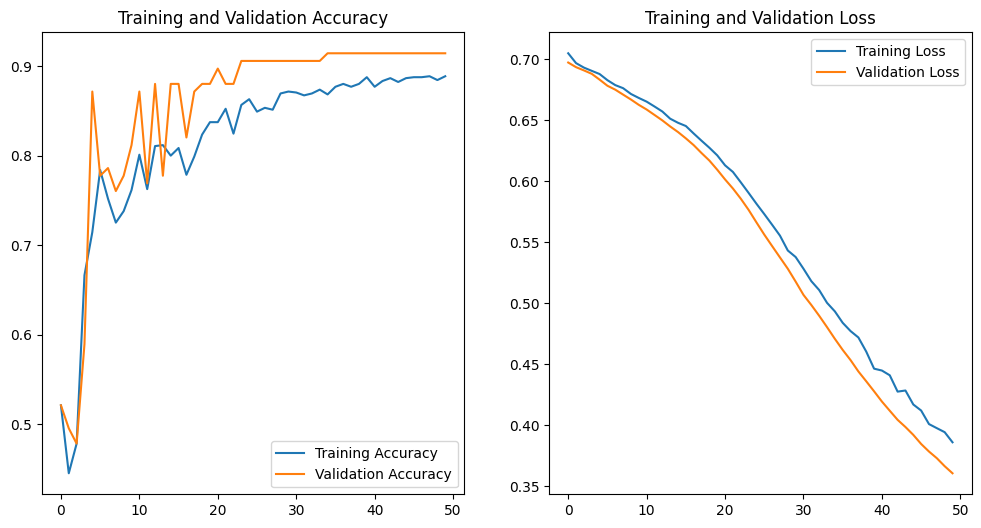

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# --- Custom PI Controller Layer ---
import tensorflow as tf
from tensorflow.keras import layers

# --- Custom PI Layer ---
class PILayer(tf.keras.layers.Layer):
    def __init__(self, target_intensity=0.5, Kp=0.8, Ki=0.05, max_iter=5, **kwargs):
        super(PILayer, self).__init__(**kwargs)
        self.target_intensity = target_intensity
        self.Kp = Kp
        self.Ki = Ki
        self.max_iter = max_iter

    def call(self, inputs):
        out = tf.identity(inputs)
        integral_error = 0.0
        for _ in range(self.max_iter):
            current_avg = tf.reduce_mean(out)
            error = self.target_intensity - current_avg
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            out = out + adjustment
            out = tf.clip_by_value(out, 0.0, 1.0)
        return out

# --- CNN Model Without Flatten/Dense ---
class CNNWithPIConvOutput(tf.keras.Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.pi = PILayer()

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.global_avg_pool = layers.GlobalAveragePooling2D()

        # Instead of dense layers, use 1x1 convolution followed by GlobalAvgPool
        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        x = self.pi(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        x = self.out_conv(x)
        x = self.global_avg_pool(x)

        return x


# Data paths
train_dir = '/content/train111x'
val_dir = '/content/validation111x'

# Image dimensions and batch size
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Model instantiation
model = CNNWithPIAndGlobalPool() # Changed to CNNWithPIAndGlobalPool to use tf model

# Optimizer and learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Reduced learning rate
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Compile model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[lr_scheduler]
)

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Path to your test data directory (structure: test_dir/class1, test_dir/class2)
test_dir = '/content/test111x'

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=1,  # Use batch_size=1 for per-image predictions (or any divisor of total images)
    class_mode='binary',
    shuffle=False  # Important: keeps order for metrics
)


Found 118 images belonging to 2 classes.


Found 936 images belonging to 2 classes.
Found 117 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 656ms/step - accuracy: 0.8374 - loss: 0.4111 - val_accuracy: 0.5214 - val_loss: 1.2660
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 446ms/step - accuracy: 0.9270 - loss: 0.2321 - val_accuracy: 0.5214 - val_loss: 0.8085
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 449ms/step - accuracy: 0.9633 - loss: 0.1951 - val_accuracy: 0.5214 - val_loss: 0.7656
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 442ms/step - accuracy: 0.9350 - loss: 0.1935 - val_accuracy: 0.8974 - val_loss: 0.6062
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 440ms/step - accuracy: 0.9561 - loss: 0.1794 - val_accuracy: 0.4872 - val_loss: 0.7334
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 448ms/step - accuracy: 0.9504 - loss: 0.1677 - val_accuracy: 0.5043 - val_loss: 0.6293
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 450ms/step - accuracy: 0.9556 - loss: 0.1713 - val_accuracy: 0.5726 - val_loss: 0.5510
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - accuracy: 0.9592 - loss: 0.1587 - val_accu

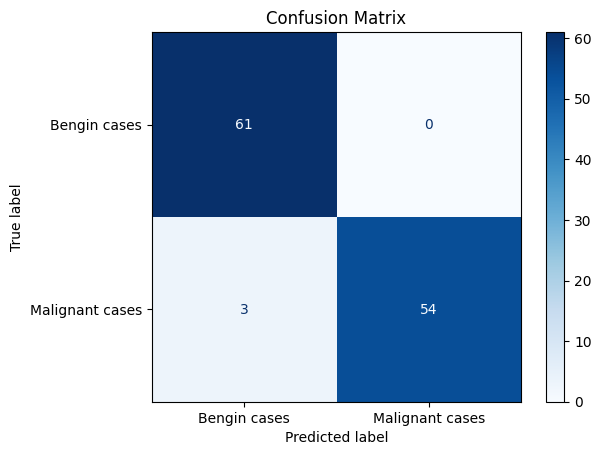

Accuracy:  0.9746
Precision: 1.0000
Recall:    0.9474
F1 Score:  0.9730
AUC-ROC:   0.9980


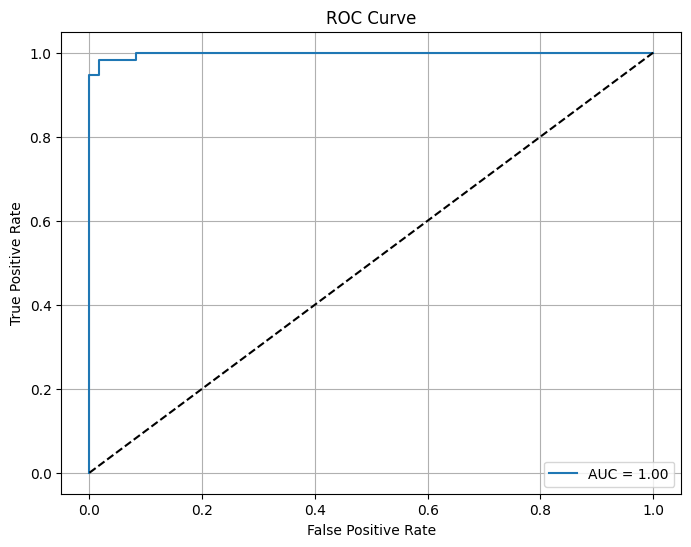

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

# --- Custom PI Layer ---
class PILayer(tf.keras.layers.Layer):
    def __init__(self, target_intensity=0.5, Kp=0.8, Ki=0.05, max_iter=5, **kwargs):
        super(PILayer, self).__init__(**kwargs)
        self.target_intensity = target_intensity
        self.Kp = Kp
        self.Ki = Ki
        self.max_iter = max_iter

    def call(self, inputs):
        out = tf.identity(inputs)
        integral_error = 0.0
        for _ in range(self.max_iter):
            current_avg = tf.reduce_mean(out)
            error = self.target_intensity - current_avg
            integral_error += error
            adjustment = self.Kp * error + self.Ki * integral_error
            out = out + adjustment
            out = tf.clip_by_value(out, 0.0, 1.0)
        return out

# --- CNN Model Without Flatten/Dense ---
class CNNWithPIConvOutput(tf.keras.Model):
    def __init__(self):
        super(CNNWithPIConvOutput, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D(2)

        self.pi = PILayer()

        self.conv2 = layers.Conv2D(64, 3, padding='same', activation='relu')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D(2)

        self.conv3 = layers.Conv2D(128, 3, padding='same', activation='relu')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D(2)

        self.global_avg_pool = layers.GlobalAveragePooling2D()

        # Instead of dense layers, use 1x1 convolution followed by GlobalAvgPool
        self.out_conv = layers.Conv2D(1, kernel_size=1, activation='sigmoid')

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)

        x = self.pi(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)

        x = self.out_conv(x)
        x = self.global_avg_pool(x)

        return x

# --- Parameters ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30

# --- Data Preparation ---
train_dir = '/content/train111x'
val_dir = '/content/validation111x'
test_dir = '/content/test111x'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# --- Model Instantiation ---
model = CNNWithPIConvOutput()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- Train the Model (no callbacks) ---
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# --- Evaluate on Test Data ---
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# --- Predictions ---
pred_probs = model.predict(test_generator)
pred_classes = (pred_probs > 0.5).astype(int).ravel()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- Confusion Matrix ---
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --- Metrics ---
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, zero_division=0)
recall = recall_score(true_classes, pred_classes, zero_division=0)
f1 = f1_score(true_classes, pred_classes, zero_division=0)
auc = roc_auc_score(true_classes, pred_probs)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(true_classes, pred_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example per-channel PSNR and SSIM data (replace with your actual values)
psnr_per_channel = [7.78, 7.79, 7.81, 7.76, 7.80, 7.77, 7.82, 7.75, 7.83, 7.79]
ssim_per_channel = [0.004, 0.004, 0.008, 0.01, 0.003, 0.009, 0.009, 0.005, 0.012, 0.006]

avg_psnr = 24.864833932097397
avg_ssim = 0.8525788055521843


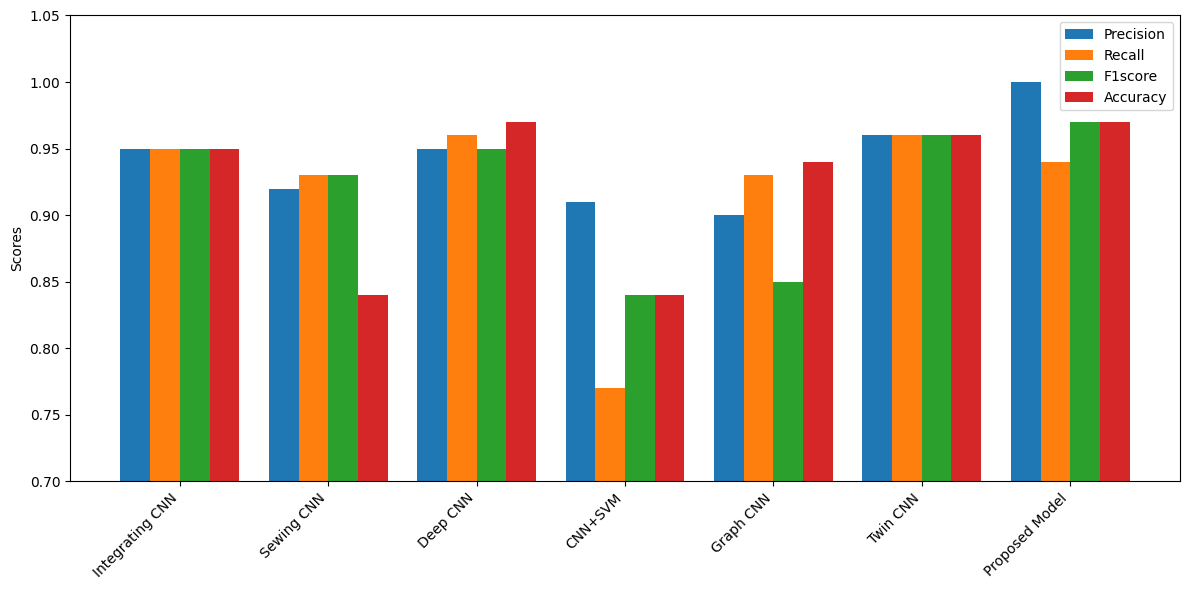

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the table
data = {
    'Methods': [
        'Integrating CNN',
        'Sewing CNN',
        'Deep CNN',
        'CNN+SVM',
        'Graph CNN',
        'Twin CNN',
        'Proposed Model'
    ],
    'Precision': [0.95, 0.92, 0.95, 0.91, 0.90, 0.96, 1.00],
    'Recall': [0.95, 0.93, 0.96, 0.77, 0.93, 0.96, 0.94],
    'F1score': [0.95, 0.93, 0.95, 0.84, 0.85, 0.96, 0.97],
    'Accuracy': [0.95, 0.84, 0.97, 0.84, 0.94, 0.96, 0.97]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot settings
metrics = ['Precision', 'Recall', 'F1score', 'Accuracy']
x = np.arange(len(df['Methods']))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Create grouped bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, df[metric], width, label=metric)

# Add labels and legend
ax.set_ylabel('Scores')
#ax.set_title('Comparative Analysis of CNN Variants')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(df['Methods'], rotation=45, ha='right')
ax.set_ylim([0.7, 1.05])
ax.legend()

plt.tight_layout()
plt.show()
